In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks', color_codes=True, font_scale=0.8)

import numpy as np
import pandas as pd
import scipy
from tqdm import tqdm

%matplotlib inline

This notebook generates some of the precursor files for the fragment decomposition figures.

In [2]:
ysi = pd.read_csv('ysi.csv').set_index('SMILES')
fragments = pd.read_csv('fragments.csv', index_col=0)
frag_summary = pd.read_csv('data/frag_summary.csv', index_col=0)
frag_regression = pd.read_pickle('data/fragment_regression.p')

In [3]:
fragments.shape

(441, 66)

In [4]:
frag_summary['mol_count'] = (fragments > 0).sum(0)
frag_summary = frag_summary[frag_summary.mol_count > 4]

In [5]:
ox = frag_summary[frag_summary.oxygenate]

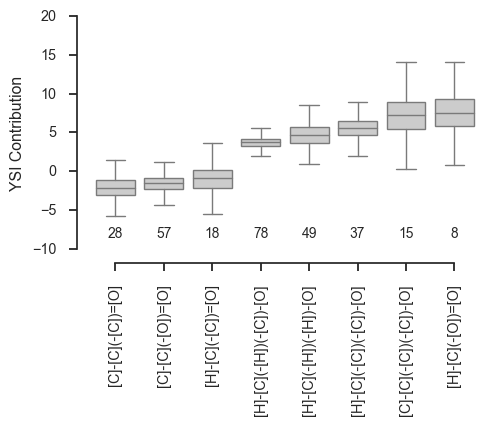

In [6]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
sns.boxplot(data=frag_regression[ox.index], fliersize=0, color='.8', linewidth=1, width=0.8)

sns.despine(offset=10, trim=True)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_rotation(90) 

ax.set_ylabel('YSI Contribution')

for i, (smart, row) in enumerate(ox.iterrows()):
    ax.text(i, -8, row.mol_count, ha='center', va='center')

# fig.savefig('oxygenates.svg')

In [7]:
aliphatic = frag_summary[(~frag_summary.oxygenate) & (~frag_summary.aromatic)]

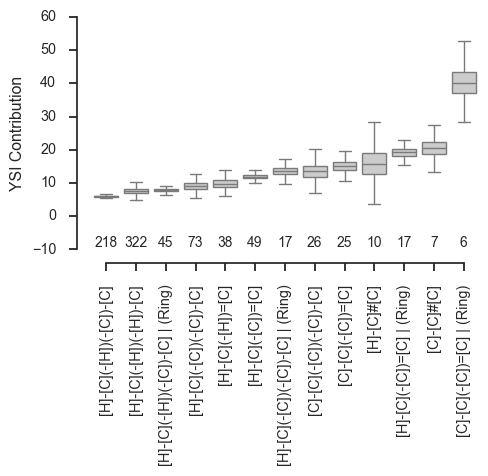

In [8]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

sns.boxplot(data=frag_regression[aliphatic.index], fliersize=0, color='.8', linewidth=1, width=0.8)
sns.despine(offset=10, trim=True)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_rotation(90) 

ax.set_ylabel('YSI Contribution')

for i, (smart, row) in enumerate(aliphatic.iterrows()):
    ax.text(i, -8, row.mol_count, ha='center', va='center')

# fig.savefig('nonaromats.svg')

In [9]:
fragments

,[C]#[C]-[c],[C]-[C]#[C],[C]-[C](-[C])(-[C])-[C],[C]-[C](-[C])(-[C])-[C] | (Ring),[C]-[C](-[C])(-[C])-[O],[C]-[C](-[C])(-[C])-[c],[C]-[C](-[C])(-[O])-[O],[C]-[C](-[C])(-[c])-[c],[C]-[C](-[C])=[C],[C]-[C](-[C])=[C] | (Ring),...,[O]-[C](-[O])(-[O])-[O],[O]-[C](-[O])=[O],[c]-[C]#[N],[c]-[C](-[c])=[O],[c]-[c](:[c]):[c] | (Ring),[c]:[c](:[c])-[Br] | (Ring),[c]:[c](:[c])-[Cl] | (Ring),[c]:[c](:[c])-[F] | (Ring),[c]:[c](:[c])-[O] | (Ring),[c]:[c](:[c]):[c] | (Ring)
SMILES,,,,,,,,,,,,,,,,,,,,,
c1ccc(-c2ccccc2-c2ccccc2)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
c1cc2c3c(c1)ccc1cccc(c13)C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
c1ccc2c(c1)-c1cccc3cccc-2c13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,2
c1ccc(-c2cccc(-c3ccccc3)c2)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
c1cc2ccc3cccc4ccc(c1)c2c34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
c1ccc(Cc2ccc(-c3ccccc3)cc2)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Cc1c2ccccc2cc2ccccc12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
c1ccc(-c2cccc3ccccc23)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2
c1ccc(C(c2ccccc2)c2ccccc2)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# svgs = [fd.draw_mol_svg(smarts, smiles=False, figsize=(80,80)) for smarts in aliphatic.index.str.replace(' \|.*$', '')]

# for i, svg in enumerate(svgs):
#     with open('frag_svgs/alpif{:02d}.svg'.format(i), 'w') as f:
#         f.write(svg)

In [11]:
aro = frag_summary[(frag_summary.aromatic)]
aro

,Count,Median,Hpd,ring,oxygenate,aromatic,mol_count
SMARTS,,,,,,,
[H]-[C](-[H])(-[H])-[c],44,-98.723288,"[-124.77182228645543, -74.03444388498853]",False,False,True,44
[H]-[C](-[H])(-[C])-[c],36,-53.998185,"[-79.20181435401035, -28.628528798619946]",False,False,True,36
[H]-[C](-[H])(-[C])-[c] | (Ring),10,-29.834716,"[-63.122397467887865, 4.961381053590166]",True,False,True,10
[H]-[C](=[C])-[c],10,-12.174498,"[-42.100404332759595, 20.734487380007877]",False,False,True,10
[H]-[c](:[c]):[c] | (Ring),130,18.303818,"[14.96538125594029, 21.254740085309276]",True,False,True,130
[C]#[C]-[c],9,25.621623,"[-10.862814899935458, 59.75008566781298]",False,False,True,9
[H]-[C](-[H])(-[c])-[c] | (Ring),5,35.706207,"[-29.896616177647772, 115.23176652874368]",True,False,True,5
[C]-[c](:[c]):[c] | (Ring),113,187.955249,"[164.3654491016809, 216.46280301705588]",True,False,True,113
[c]:[c](:[c]):[c] | (Ring),19,192.137390,"[176.7037722830996, 207.36960388867894]",True,False,True,19


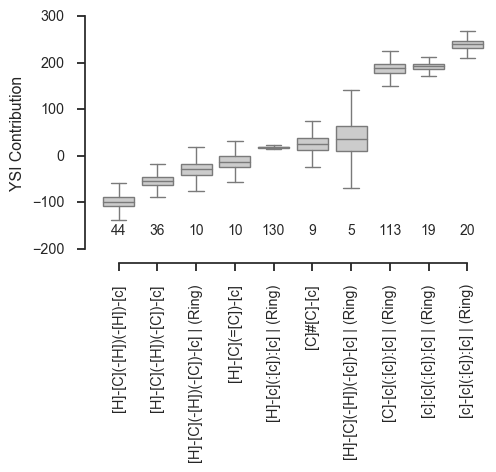

In [12]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

sns.boxplot(data=frag_regression[aro.index], fliersize=0, color='.8', linewidth=1, width=0.8)


ax.set_ylabel('YSI Contribution')

for i, (smart, row) in enumerate(aro.iterrows()):
    ax.text(i, -160, row.Count, ha='center', va='center')
    
sns.despine(offset=10, trim=True)


for i, label in enumerate(ax.get_xticklabels()):
    label.set_rotation(90) 

# fig.savefig('aromats.svg')

In [13]:
ysi[fragments[aro.index[3]] > 0]

,Species,CAS,Ref,Type,YSI,YSI_err
SMILES,,,,,,
C/C(=C\c1ccccc1)c1ccccc1,"trans 1,2-diphenylpropene",833-81-8,2.0,aromatic,753.6,28.5
C(=C\c1ccccc1)\c1ccccc1,"cis 1,2-diphenylethylene",645-49-8,2.0,aromatic,602.0,22.8
C(=C/c1ccccc1)\c1ccccc1,"trans 1,2-diphenylethylene",103-30-0,2.0,aromatic,602.0,34.8
C=Cc1cc(C)ccc1C,"1-ethenyl-2,5-dimethylbenzene",2039-89-6,1.0,aromatic,469.3,17.8
CC(C)=Cc1ccccc1,(2-methyl-1-propenyl)-benzene,768-49-0,1.0,aromatic,436.9,16.6
C=Cc1ccccc1C,1-ethenyl-2-methylbenzene,611-15-4,1.0,aromatic,408.1,15.9
C/C=C/c1ccccc1,(1-propenyl)-benzene,637-50-3,1.0,aromatic,352.2,13.5
C=Cc1cccc(C)c1,1-ethenyl-3-methylbenzene,100-80-1,1.0,aromatic,322.4,12.8
C=Cc1ccc(C)cc1,1-ethenyl-4-methylbenzene,622-97-9,1.0,aromatic,318.8,12.8


In [14]:
# svgs = [fd.draw_mol_svg(smarts, smiles=False, figsize=(80,80)) for smarts in aro.index.str.replace(' \|.*$', '')]

# for i, svg in enumerate(svgs):
#     with open('frag_svgs/aro{:02d}.svg'.format(i), 'w') as f:
#         f.write(svg)

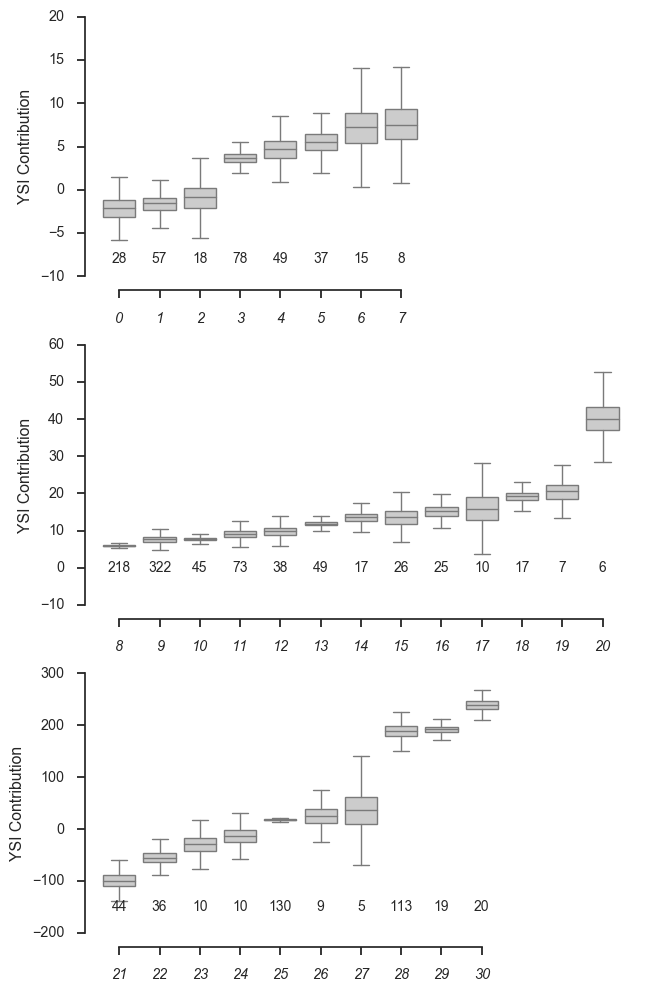

In [15]:
fig = plt.figure(figsize=(7,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Oxygenates
sns.boxplot(data=frag_regression[ox.index], fliersize=0, color='.8', linewidth=1,
            width=0.8, ax=ax1)
ax1.set_xticks(range(len(ox)))

for i, (smart, row) in enumerate(ox.iterrows()):
    ax1.text(i, -8, row.Count, ha='center', va='center')
    
    
# Aliphatics    
sns.boxplot(data=frag_regression[aliphatic.index], fliersize=0, color='.8', linewidth=1,
            width=0.8, ax=ax2)

for i, (smart, row) in enumerate(aliphatic.iterrows()):
    ax2.text(i, 0, row.Count, ha='center', va='center')

# Aromatics
sns.boxplot(data=frag_regression[aro.index], fliersize=0,
            color='.8', linewidth=1, width=0.8, ax=ax3)

for i, (smart, row) in enumerate(aro.iterrows()):
    ax3.text(i, -150, row.Count, ha='center', va='center')
    
ax1.set_xlim(-0.5, 13.5)
ax2.set_xlim(-0.5, 13.5)
ax3.set_xlim(-0.5, 13.5)

ax1.set_ylabel('YSI Contribution')
ax2.set_ylabel('YSI Contribution')
ax3.set_ylabel('YSI Contribution')

#ax1.set_ylim([-10, 30])
#ax1.set_yticks(np.arange(-10, 40, 10))

sns.despine(offset=10, trim=True)
fig.tight_layout()

ax1.set_xticklabels(np.arange(len(ox)), {'style': 'italic'})
ax2.set_xticklabels(len(ox) + np.arange(len(aliphatic)), {'style': 'italic'})
ax3.set_xticklabels(len(ox) + len(aliphatic) + np.arange(len(aro)), {'style': 'italic'})

fig.savefig('figures/raw_combined_boxplots.svg', transparent=True)

In [16]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

from IPython.display import SVG

def draw_all(smarts, name):
    for i in range(len(smarts)):
        mol = Chem.MolFromSmarts(smarts[i])
        mc = Chem.Mol(mol.ToBinary())
        rdDepictor.Compute2DCoords(mc)

        drawer = rdMolDraw2D.MolDraw2DSVG(80, 80)

        center = int(pd.Series({atom.GetIdx(): len(atom.GetNeighbors()) for atom in mol.GetAtoms()}).argmax())
        to_highlight = [int(atom.GetIdx()) for atom in mol.GetAtoms() if atom.GetIsAromatic()]
        color_dict = {i: (0.2, 0.8, 0.2) for i in to_highlight}
        radius_dict = {i: 0.25 for i in to_highlight}
        radius_dict[center] = 0.5

        if center not in to_highlight:
            to_highlight += [center]
            color_dict[center] = (0.8,0.8,0.8)

        drawer.DrawMolecule(mc, highlightAtoms=to_highlight,
                            highlightAtomColors=color_dict,
                            highlightAtomRadii=radius_dict,
                            highlightBonds=False)
    #    drawer.DrawString(str(i), Point2D(0, -0.75))

        drawer.FinishDrawing()
        svg = drawer.GetDrawingText()

        svg = SVG(svg.replace('svg:', '').replace(':svg', ''))

        with open('fragment_images/{}_{}.svg'.format(name, i), 'w') as f:
            f.write(svg.data)

draw_all([mol_str for mol_str in ox.index.str.replace(' \|.*$', '')], 'ox')
draw_all([mol_str for mol_str in aliphatic.index.str.replace(' \|.*$', '')], 'ali')
draw_all([mol_str for mol_str in aro.index.str.replace(' \|.*$', '')], 'aro')

In [69]:
def get_greedy_mols():
    
    bool_frags = fragments[frag_summary.index] > 0
    while True:
        chosen_smarts = (bool_frags).sum(1).argmax()
        yield chosen_smarts
        bool_frags = bool_frags.loc[:, ~bool_frags.loc[chosen_smarts]]
        if bool_frags.shape[1] == 0:
            break

In [70]:
list(get_greedy_mols())

['CCCCCc1ccc(-c2ccccc2)cc1',
 'CC1=CC2C3CC(C=C3C)C2C1',
 'CCC=C(C)C(=O)OC',
 'C#Cc1cc(C)ccc1C',
 'CC(CC=O)CC(C)(C)C',
 'CC(O)COC(C)(C)C',
 'c1cc2c3c(c1)ccc1cccc(c13)C2',
 'C=Cc1cc(C)ccc1C',
 'c1ccc2c(c1)CCc1ccccc1C2',
 'CCC#Cc1ccccc1',
 'CC(C)(C)C(=O)C(C)(C)C',
 'CC(C)CCOC=O']